In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform
from scipy.integrate import quad

import functions as fcts

import sys, os, time, fileinput

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('default') 

In [2]:
x_data, y_data = np.load('data/skymap/sample_skymap_upper.npy', allow_pickle=True)

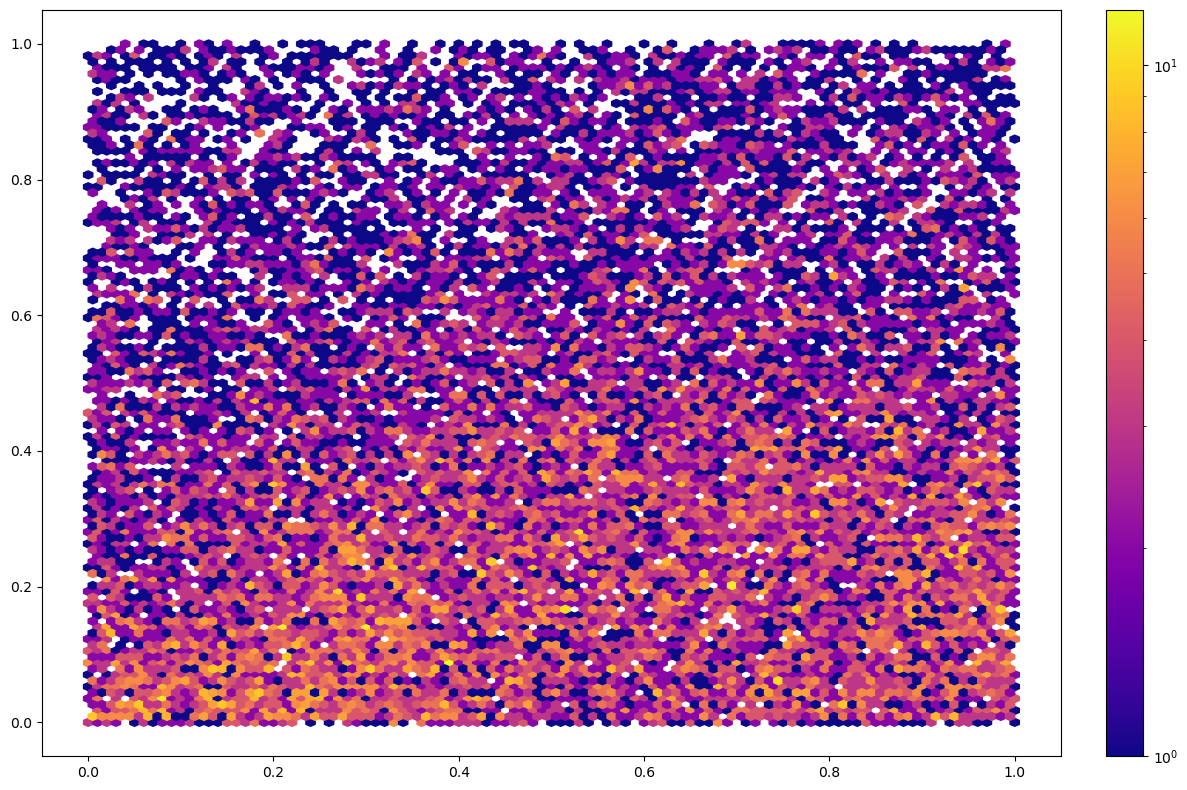

In [3]:
fig = plt.figure(1,figsize=(12,8))
ax = fig.add_subplot(111)

s = ax.hexbin(x_data,y_data,gridsize=100,cmap='plasma',mincnt=1,bins='log')

plt.colorbar(s,fraction=0.046, pad=0.04)

plt.tight_layout()

In [4]:
# step_size = 0.005
# arr_bx_plot = np.arange(0,1+step_size,step_size, dtype = float)
# arr_by_plot = np.arange(0,1+step_size,step_size, dtype = float)
# arr_bx = 0.5 * (arr_bx_plot[:-1] + arr_bx_plot[1:])
# arr_by = 0.5 * (arr_by_plot[:-1] + arr_by_plot[1:])
# Nx = len(arr_bx)
# Ny = len(arr_by)

step_size = 0.005
arr_bx_plot = np.arange(-0.2,1.2+step_size,step_size, dtype = float)
arr_by_plot = np.arange(-0.2,1.2+step_size,step_size, dtype = float)
arr_bx = 0.5 * (arr_bx_plot[:-1] + arr_bx_plot[1:])
arr_by = 0.5 * (arr_by_plot[:-1] + arr_by_plot[1:])
Nx = len(arr_bx)
Ny = len(arr_by)


log_arr_a_edge = np.linspace(-3,1,1000+1)
arr_a_edge = 10**log_arr_a_edge
arr_a = 0.5 * (arr_a_edge[:-1] + arr_a_edge[1:])
Na = len(arr_a)
arr_a = arr_a.astype(np.float32)

In [5]:
cwt_map = np.load('cwt_map_2.npy', allow_pickle = True)

degree = 0.6
scale = degree / 15  / 2
na = np.where(arr_a > scale)[0][0]
# na = np.where(arr_a_rev < 0.005)[0][0]

print(scale)

0.02


In [6]:
# remove the boundary
step_size = 0.005
arr_bx_plot_nb = np.arange(0.05,1+step_size-0.05,step_size, dtype = float)
arr_by_plot_nb = np.arange(0.05,1+step_size-0.05,step_size, dtype = float)
arr_bx_nb = 0.5 * (arr_bx_plot_nb[:-1] + arr_bx_plot_nb[1:])
arr_by_nb = 0.5 * (arr_by_plot_nb[:-1] + arr_by_plot_nb[1:])

n_lower = np.where(arr_bx > 0.05)[0]
n_higher = np.where(arr_bx < 0.95)[0]
n_nb = np.intersect1d(n_lower, n_higher)
Nx_nb = len(n_nb)

cwt_map_nb = np.zeros((Nx_nb, Nx_nb))
for nx in range(Nx_nb):
    kx = n_nb[nx]
    for ny in range(Nx_nb):
        ky = n_nb[ny]
        cwt_map_nb[nx,ny] = cwt_map[kx,ky,na]

Text(0, 0.5, '$\\tilde{\\theta}$')

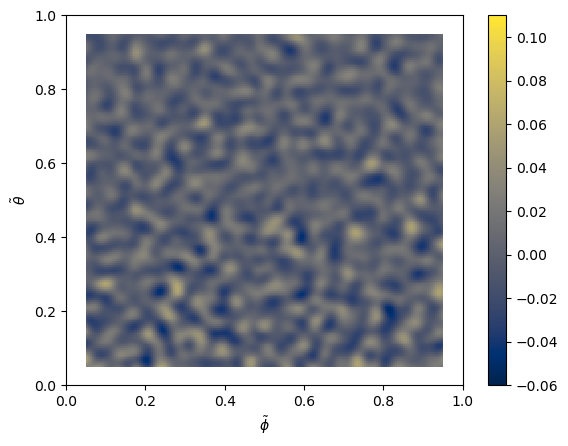

In [7]:
plot = plt.pcolormesh(arr_bx_plot_nb, arr_by_plot_nb, cwt_map_nb.T, cmap='cividis', shading='flat'
                      , norm=mpl.colors.Normalize(vmin=-0.06, vmax=0.11))
# contour needs the centers
# cset = plt.contour(X, Y, Z, cmap='gray')
# plt.clabel(cset, inline=True)

plt.colorbar(plot)
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('$\\tilde{\\phi}$')
plt.ylabel('$\\tilde{\\theta}$')

Text(0, 0.5, '$y$')

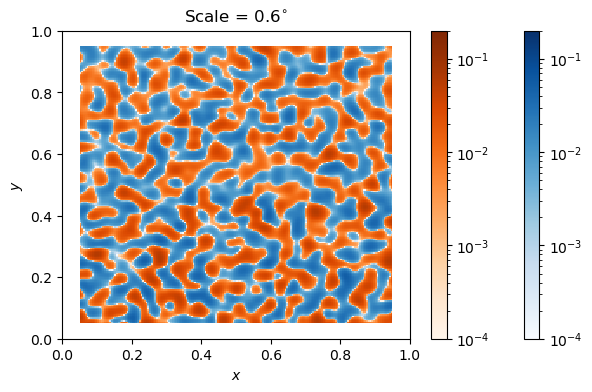

In [8]:
fig = plt.figure(1,figsize=(7,4))
ax = fig.add_subplot(111)

plot_1 = plt.pcolormesh(arr_bx_plot_nb, arr_by_plot_nb, cwt_map_nb.T, cmap='Oranges', shading='flat'
                      , norm=mpl.colors.LogNorm(vmin = 10**-4,vmax = 0.2))
plot_2 = plt.pcolormesh(arr_bx_plot_nb, arr_by_plot_nb, -cwt_map_nb.T, cmap='Blues', shading='flat'
                      , norm=mpl.colors.LogNorm(vmin = 10**-4,vmax = 0.2))
# contour needs the centers
# cset = plt.contour(X, Y, Z, cmap='gray')
# plt.clabel(cset, inline=True)

plt.colorbar(plot_2)
plt.colorbar(plot_1)
plt.title('Scale = ' + str(degree) + '$^{\circ}$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('$x$')
plt.ylabel('$y$')

/cms/base/HETconda/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


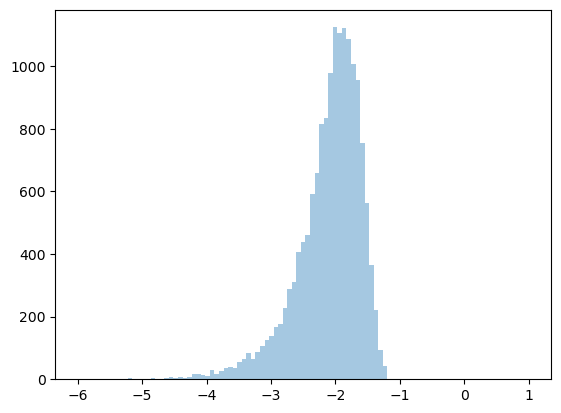

In [9]:
cwt_flat_na = cwt_map_nb.flatten()
bins = np.linspace(-6,1,100)
counts_bkg, bins, _ = plt.hist(np.log10(cwt_flat_na), bins = bins, alpha = 0.4)

Text(0, 0.5, '$\\tilde{\\theta}$')

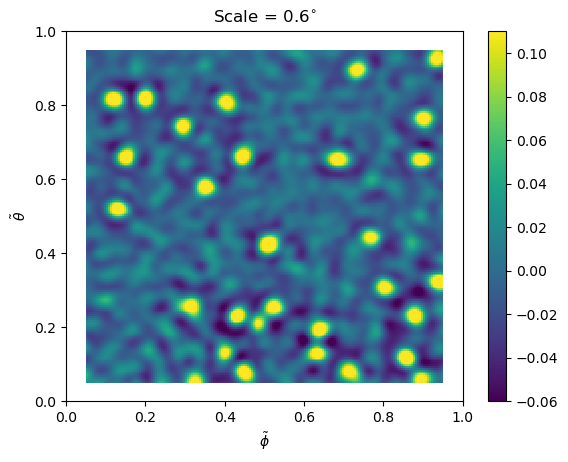

In [10]:
cwt_map_wps = np.load('cwt_map_wps_2.npy', allow_pickle = True)

cwt_map_wps_nb = np.zeros((Nx_nb, Nx_nb))
for nx in range(Nx_nb):
    kx = n_nb[nx]
    for ny in range(Nx_nb):
        ky = n_nb[ny]
        cwt_map_wps_nb[nx,ny] = cwt_map_wps[kx,ky,na]
        
plot = plt.pcolormesh(arr_bx_plot_nb, arr_by_plot_nb, cwt_map_wps_nb.T, cmap='viridis', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=-0.06, vmax=0.11))
# contour needs the centers
# cset = plt.contour(X, Y, Z, cmap='gray')
# plt.clabel(cset, inline=True)

plt.colorbar(plot)
plt.title('Scale = ' + str(degree) + '$^{\circ}$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('$\\tilde{\\phi}$')
plt.ylabel('$\\tilde{\\theta}$')

Text(0, 0.5, '$y$')

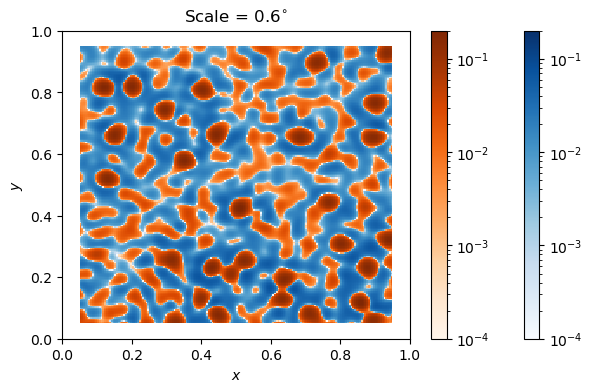

In [11]:
fig = plt.figure(1,figsize=(7,4))
ax = fig.add_subplot(111)

plot_1 = plt.pcolormesh(arr_bx_plot_nb, arr_by_plot_nb, cwt_map_wps_nb.T, cmap='Oranges', shading='flat'
                      , norm=mpl.colors.LogNorm(vmin = 10**-4,vmax = 0.2))
plot_2 = plt.pcolormesh(arr_bx_plot_nb, arr_by_plot_nb, -cwt_map_wps_nb.T, cmap='Blues', shading='flat'
                      , norm=mpl.colors.LogNorm(vmin = 10**-4,vmax = 0.2))
# contour needs the centers
# cset = plt.contour(X, Y, Z, cmap='gray')
# plt.clabel(cset, inline=True)

plt.colorbar(plot_2)
plt.colorbar(plot_1)
plt.title('Scale = ' + str(degree) + '$^{\circ}$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('$x$')
plt.ylabel('$y$')

/cms/base/HETconda/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


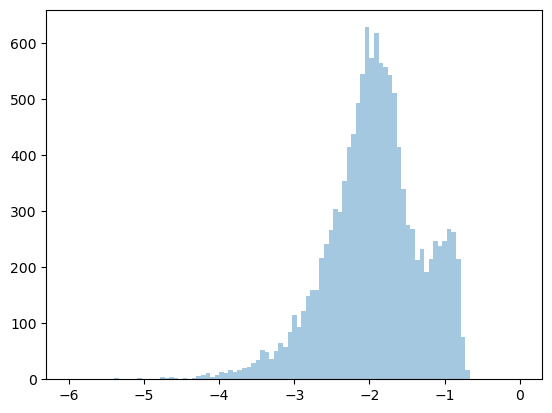

In [12]:
cwt_wps_flat_na = cwt_map_wps_nb.flatten()
bins = np.linspace(-6,0,100)
counts_tot, bins, _ = plt.hist(np.log10(cwt_wps_flat_na), bins = bins, alpha = 0.4)

/cms/base/HETconda/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/cms/base/HETconda/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


Text(0, 0.5, 'N')

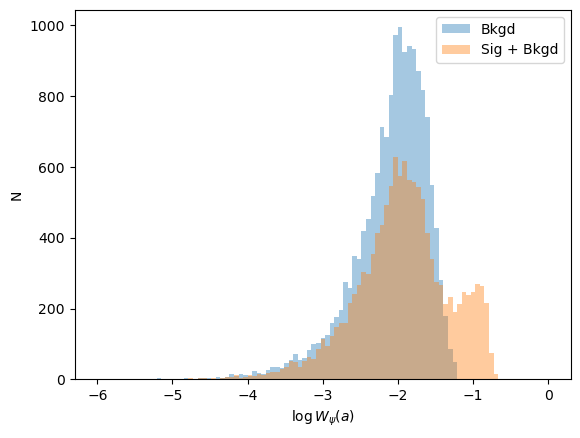

In [13]:
counts_bkg, bins, _ = plt.hist(np.log10(cwt_flat_na), bins = bins, alpha = 0.4, label = 'Bkgd')
counts_tot, bins, _ = plt.hist(np.log10(cwt_wps_flat_na), bins = bins, alpha = 0.4, label = 'Sig + Bkgd')
plt.legend()
plt.xlabel('$\\log W_{\\psi}(a)$')
plt.ylabel('N')

In [14]:
# addition: calculate signal distribution
xloc_list, yloc_list = np.load('data/skymap/sample_skymap_upper_wps_2_locs.npy', allow_pickle=True)
loc_list = np.vstack((xloc_list, yloc_list)).T

# define mesh grid
mesh_bx, mesh_by = np.meshgrid(arr_bx_nb,arr_by_nb) # each output array (NxN shaped) contains x or y value at given (i,j)-th position
mesh_bxby = np.stack((mesh_bx, mesh_by), axis=-1)

def closest_grid_point_(point, grid_points):
    relative_positions = grid_points - point
    distances = np.linalg.norm(relative_positions, axis = -1)
    bxby_index_shape = distances.shape
    flattened_index = np.argmin(distances)
    return np.unravel_index(flattened_index, bxby_index_shape)

In [15]:
cwt_sig = np.empty(shape = (1))
Nps = len(xloc_list)
psf_scale = 0.4 / 15 / 2
effective_ps_size = 2 * psf_scale
for n in range(Nps):
    buf_loc_list = loc_list[np.newaxis, np.newaxis]
    point = loc_list[n]
    buf_point = point[np.newaxis, np.newaxis]
    
    index = closest_grid_point_(point, mesh_bxby)
    nx = index[0]
    ny = index[1]

    closest_point = mesh_bxby[index]
    buf_closest_point = closest_point[np.newaxis, np.newaxis]
    relative_positions = buf_closest_point - mesh_bxby
    distances = np.linalg.norm(relative_positions, axis = -1)
    indices = np.where(distances < effective_ps_size)
    kx = indices[0]
    ky = indices[1]

    cwt_sig_single = cwt_map_wps_nb[ky,kx].T
    cwt_sig = np.concatenate((cwt_sig, cwt_sig_single))

/cms/base/HETconda/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/cms/base/HETconda/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/cms/base/HETconda/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


(0.0, 1200.0)

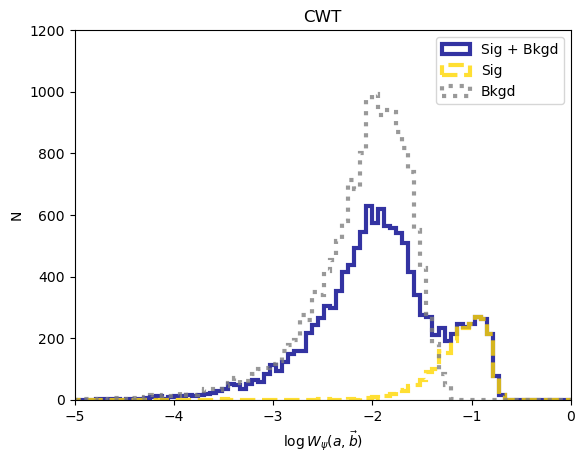

In [33]:
counts_tot, bins, _ = plt.hist(np.log10(cwt_wps_flat_na), bins = bins, alpha = 0.8, label = 'Sig + Bkgd', 
                               color = 'darkblue', histtype = 'step', lw = 3, ls = '-')
counts_sig, bins, _ = plt.hist(np.log10(cwt_sig), bins = bins, alpha = 0.8, label = 'Sig', 
                               color = 'gold', histtype = 'step', lw = 3, ls = '--')
counts_bkg, bins, _ = plt.hist(np.log10(cwt_flat_na), bins = bins, alpha = 0.8, label = 'Bkgd', 
                               color = 'gray', histtype = 'step', lw = 3, ls = 'dotted')
plt.legend()
plt.title('CWT')
plt.xlabel('$\\log W_{\\psi}(a,\\vec{b})$')
plt.ylabel('N')
plt.xlim([-5,0])
plt.ylim([0,1200])

In [ ]:
counts_bkg, bins, _ = plt.hist(np.log10(cwt_flat_na), bins = bins, alpha = 0.5, label = 'Bkgd', color = 'gray')
counts_tot, bins, _ = plt.hist(np.log10(cwt_wps_flat_na), bins = bins, alpha = 0.5, label = 'Sig + Bkgd', color = 'darkblue')
counts_sig, bins, _ = plt.hist(np.log10(cwt_sig), bins = bins, alpha = 0.5, label = 'Sig', color = 'yellow')
plt.legend()
plt.xlabel('$\\log W_{\\psi}(a)$')
plt.ylabel('N')
plt.xlim([-5,0])
plt.ylim([0,1200])

/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


Text(0, 0.5, 'N')

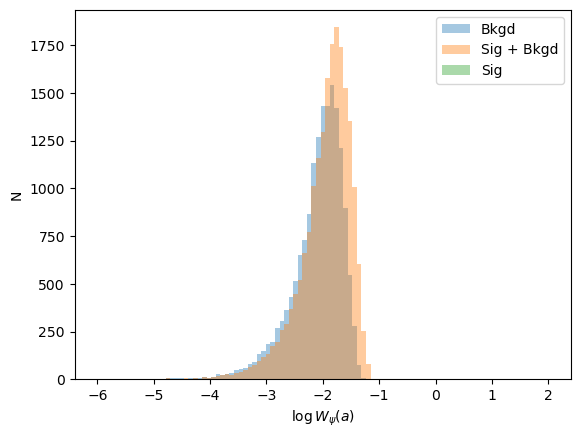

In [17]:
bins = np.linspace(-6,2,100)
counts_bkg, bins, _ = plt.hist(np.log10(-cwt_flat_na), bins = bins, alpha = 0.4, label = 'Bkgd')
counts_tot, bins, _ = plt.hist(np.log10(-cwt_wps_flat_na), bins = bins, alpha = 0.4, label = 'Sig + Bkgd')
counts_sig, bins, _ = plt.hist(np.log10(-cwt_sig), bins = bins, alpha = 0.4, label = 'Sig')
plt.legend()
plt.xlabel('$\\log W_{\\psi}(a)$')
plt.ylabel('N')

Text(0, 0.5, '$\\tilde{\\theta}$')

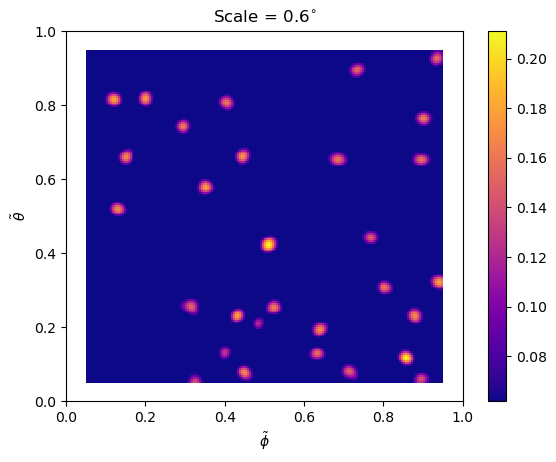

In [18]:
cwt_map_wps = np.load('cwt_map_wps_2.npy', allow_pickle = True)

cwt_map_wps_nb = np.zeros((Nx_nb, Nx_nb))
for nx in range(Nx_nb):
    kx = n_nb[nx]
    for ny in range(Nx_nb):
        ky = n_nb[ny]
        cwt_map_wps_nb[nx,ny] = cwt_map_wps[kx,ky,na]
        
plot = plt.pcolormesh(arr_bx_plot_nb, arr_by_plot_nb, cwt_map_wps_nb.T, cmap='plasma', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=np.max(cwt_map_nb), vmax=np.max(cwt_map_wps_nb)))
# contour needs the centers
# cset = plt.contour(X, Y, Z, cmap='gray')
# plt.clabel(cset, inline=True)

plt.colorbar(plot)
plt.title('Scale = ' + str(degree) + '$^{\circ}$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('$\\tilde{\\phi}$')
plt.ylabel('$\\tilde{\\theta}$')

In [19]:
# We now rewrite the above, accounting for potential duplicates

# kx_list = np.empty(shape = (1), dtype = int)
# ky_list = np.empty(shape = (1), dtype = int)
# kxky_list = np.empty(shape = ((1,2)), dtype = int)
# index_list = np.empty(shape = (1), dtype = int)

Nps = len(xloc_list)
psf_scale = 0.4 / 15 / 2
effective_ps_size = 2 * psf_scale
for n in range(Nps):
    buf_loc_list = loc_list[np.newaxis, np.newaxis]
    point = loc_list[n]
    buf_point = point[np.newaxis, np.newaxis]
    
    index = closest_grid_point_(point, mesh_bxby)
    nx = index[0]
    ny = index[1]

    closest_point = mesh_bxby[index]
    buf_closest_point = closest_point[np.newaxis, np.newaxis]
    relative_positions = buf_closest_point - mesh_bxby
    distances = np.linalg.norm(relative_positions, axis = -1)
    indices = np.where(distances < effective_ps_size)
    kx = indices[0]
    ky = indices[1]
    kxky = np.vstack((kx, ky)).T
    
    if n == 0:
        kx_list = kx
        ky_list = ky
        kxky_list = kxky
    
    else:
        kx_list = np.concatenate((kx_list, kx))
        ky_list = np.concatenate((ky_list, ky))
        kxky_list = np.vstack((kxky_list, kxky))

#     cwt_sig_single = cwt_map_wps[ky,kx,na].T
#     cwt_sig = np.concatenate((cwt_sig, cwt_sig_single))

In [20]:
_, unique_indices = np.unique(kxky_list, axis = 0, return_index = True)
unique_kx = kx_list[unique_indices]
unique_ky = ky_list[unique_indices]

cwt_sig = cwt_map_wps_nb[unique_ky,unique_kx].T

/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'N')

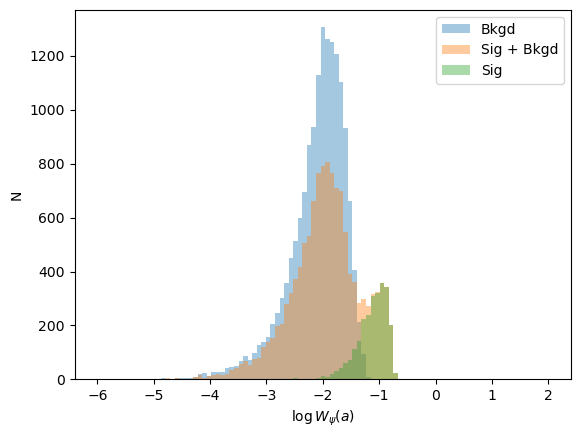

In [21]:
counts_bkg, bins, _ = plt.hist(np.log10(cwt_flat_na), bins = bins, alpha = 0.4, label = 'Bkgd')
counts_tot, bins, _ = plt.hist(np.log10(cwt_wps_flat_na), bins = bins, alpha = 0.4, label = 'Sig + Bkgd')
counts_sig, bins, _ = plt.hist(np.log10(cwt_sig), bins = bins, alpha = 0.4, label = 'Sig')
plt.legend()
plt.xlabel('$\\log W_{\\psi}(a)$')
plt.ylabel('N')

In [22]:
x1 = np.arange(0,10,1)
y1 = np.arange(0,10,1)
x1y1 = np.vstack((x1,y1)).T
x2 = np.arange(5,15,1)
y2 = np.arange(5,15,1)
x2y2 = np.vstack((x2,y2)).T

x3y3 = np.vstack((x1y1, x2y2))

In [23]:
_, unique_indices = np.unique(x3y3, axis = 0, return_index = True)
print(unique_indices)

[ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19]


/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'N')

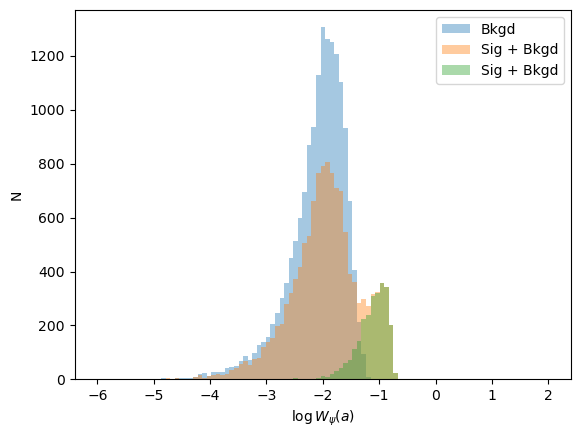

In [24]:
counts_bkg, bins, _ = plt.hist(np.log10(cwt_flat_na), bins = bins, alpha = 0.4, label = 'Bkgd')
counts_tot, bins, _ = plt.hist(np.log10(cwt_wps_flat_na), bins = bins, alpha = 0.4, label = 'Sig + Bkgd')
counts_sig, bins, _ = plt.hist(np.log10(cwt_sig), bins = bins, alpha = 0.4, label = 'Sig + Bkgd')
plt.legend()
plt.xlabel('$\\log W_{\\psi}(a)$')
plt.ylabel('N')

/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10


Text(0, 0.5, 'N')

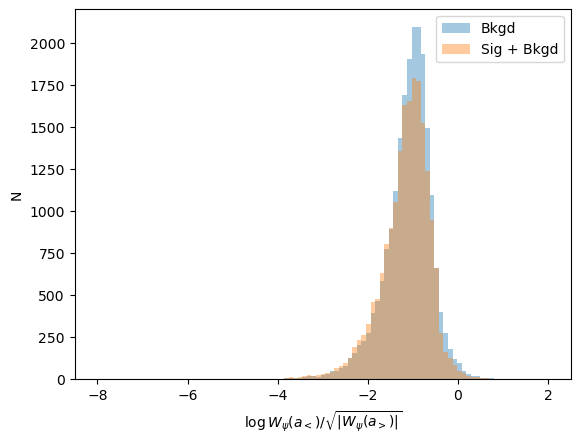

In [40]:
# ratio of CWT at different scales

cwt_map = np.load('cwt_map_2.npy', allow_pickle = True)
cwt_map_wps = np.load('cwt_map_wps_2.npy', allow_pickle = True)

degree_1 = 1
scale_1 = degree_1 / 15  / 2
na1 = np.where(arr_a > scale_1)[0][0]

degree_2 = 0.4
scale_2 = degree_2 / 15  / 2
na2 = np.where(arr_a > scale_2)[0][0]

bins = np.linspace(-8,2,100)
cwt_ratio = cwt_map[:,:,na2] / np.sqrt(np.abs(cwt_map[:,:,na1]))
cwt_ratio_flat_na = cwt_ratio.flatten()
counts_bkg, bins, _ = plt.hist(np.log10(cwt_ratio_flat_na), bins = bins, alpha = 0.4, label = 'Bkgd')

cwt_ratio_wps = cwt_map_wps[:,:,na2] / np.sqrt(np.abs(cwt_map_wps[:,:,na1]))
cwt_ratio_wps_flat_na = cwt_ratio_wps.flatten()
counts_tot, bins, _ = plt.hist(np.log10(cwt_ratio_wps_flat_na), bins = bins, alpha = 0.4, label = 'Sig + Bkgd')

plt.legend()
plt.xlabel('$\\log W_{\\psi}(a_{<}) / \sqrt{|W_{\\psi}(a_{>})|}$')
plt.ylabel('N')

In [41]:
print(np.sum(counts_bkg))
print(np.sum(counts_tot))

21215.0
19303.0


Text(0, 0.5, 'N')

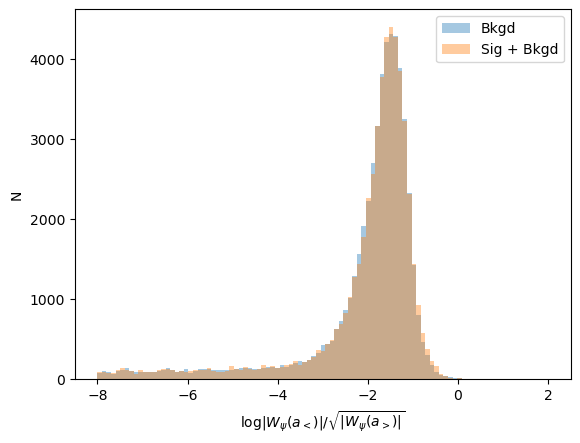

In [42]:
# ratio of CWT at different scales

cwt_map = np.load('cwt_map_2.npy', allow_pickle = True)
cwt_map_wps = np.load('cwt_map_wps_2.npy', allow_pickle = True)

degree_1 = 5
scale_1 = degree_1 / 15  / 2
na1 = np.where(arr_a > scale_1)[0][0]

degree_2 = 0.4
scale_2 = degree_2 / 15  / 2
na2 = np.where(arr_a > scale_2)[0][0]

bins = np.linspace(-8,2,100)
cwt_ratio = np.abs(cwt_map[:,:,na2]) / np.sqrt(np.abs(cwt_map[:,:,na1]))
cwt_ratio_flat_na = cwt_ratio.flatten()
counts_bkg, bins, _ = plt.hist(np.log10(cwt_ratio_flat_na), bins = bins, alpha = 0.4, label = 'Bkgd')

cwt_ratio_wps = np.abs(cwt_map_wps[:,:,na2]) / np.sqrt(np.abs(cwt_map_wps[:,:,na1]))
cwt_ratio_wps_flat_na = cwt_ratio_wps.flatten()
counts_tot, bins, _ = plt.hist(np.log10(cwt_ratio_wps_flat_na), bins = bins, alpha = 0.4, label = 'Sig + Bkgd')

plt.legend()
plt.xlabel('$\\log |W_{\\psi}(a_{<})| / \sqrt{|W_{\\psi}(a_{>})|}$')
plt.ylabel('N')

Text(0, 0.5, '$\\tilde{\\theta}$')

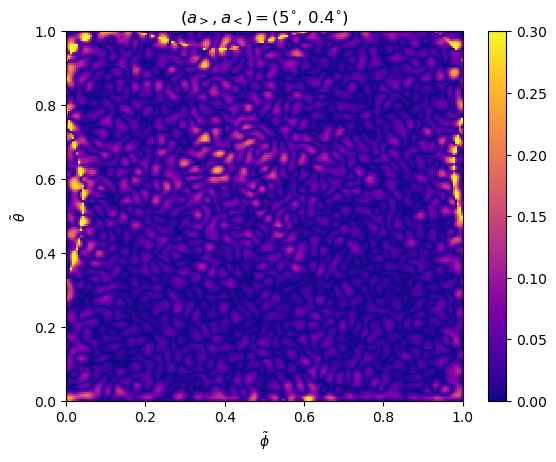

In [43]:
plot = plt.pcolormesh(arr_bx_plot, arr_by_plot, cwt_ratio.T, cmap='plasma', shading='flat'
                      , norm=mpl.colors.Normalize(vmin=0, vmax=0.3)
                     )
plt.colorbar(plot)
plt.title('$(a_> , a_< ) = ($' + str(degree_1) + '$^{\circ}$' + ', ' + str(degree_2) + '$^{\circ}$' + '$)$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('$\\tilde{\\phi}$')
plt.ylabel('$\\tilde{\\theta}$')

Text(0, 0.5, '$\\tilde{\\theta}$')

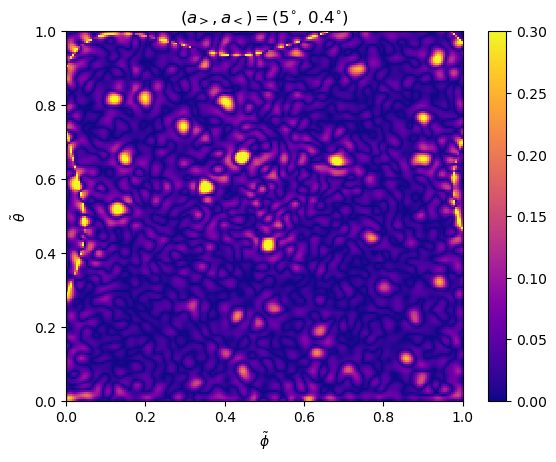

In [44]:
plot = plt.pcolormesh(arr_bx_plot, arr_by_plot, cwt_ratio_wps.T, cmap='plasma', shading='flat'
                      , norm=mpl.colors.Normalize(vmin=0, vmax=0.3)
                     )
plt.colorbar(plot)
plt.title('$(a_> , a_< ) = ($' + str(degree_1) + '$^{\circ}$' + ', ' + str(degree_2) + '$^{\circ}$' + '$)$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('$\\tilde{\\phi}$')
plt.ylabel('$\\tilde{\\theta}$')

/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10


Text(0, 0.5, 'N')

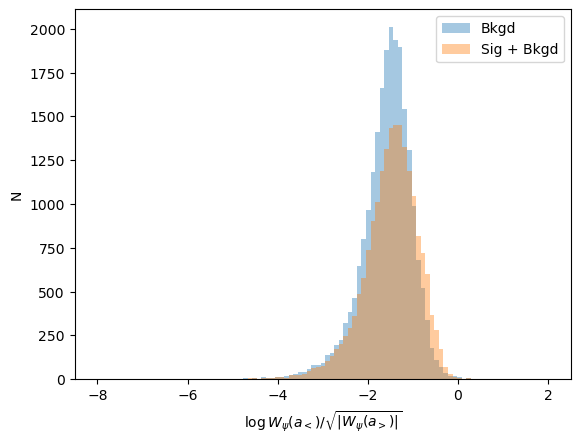

In [76]:
# ratio of CWT at different scales

cwt_map = np.load('cwt_map_2.npy', allow_pickle = True)
cwt_map_wps = np.load('cwt_map_wps_2.npy', allow_pickle = True)

degree_1 = 5
scale_1 = degree_1 / 15  / 2
na1 = np.where(arr_a > scale_1)[0][0]

degree_2 = 0.6
scale_2 = degree_2 / 15  / 2
na2 = np.where(arr_a > scale_2)[0][0]

bins = np.linspace(-8,2,100)
cwt_ratio = cwt_map[:,:,na2] / np.sqrt(np.abs(cwt_map[:,:,na1]))
cwt_ratio_flat_na = cwt_ratio.flatten()
counts_bkg, bins, _ = plt.hist(np.log10(cwt_ratio_flat_na), bins = bins, alpha = 0.4, label = 'Bkgd')

cwt_ratio_wps = cwt_map_wps[:,:,na2] / np.sqrt(np.abs(cwt_map_wps[:,:,na1]))
cwt_ratio_wps_flat_na = cwt_ratio_wps.flatten()
counts_tot, bins, _ = plt.hist(np.log10(cwt_ratio_wps_flat_na), bins = bins, alpha = 0.4, label = 'Sig + Bkgd')

plt.legend()
plt.xlabel('$\\log W_{\\psi}(a_{<}) / \sqrt{|W_{\\psi}(a_{>})|}$')
plt.ylabel('N')

Text(0, 0.5, '$\\tilde{\\theta}$')

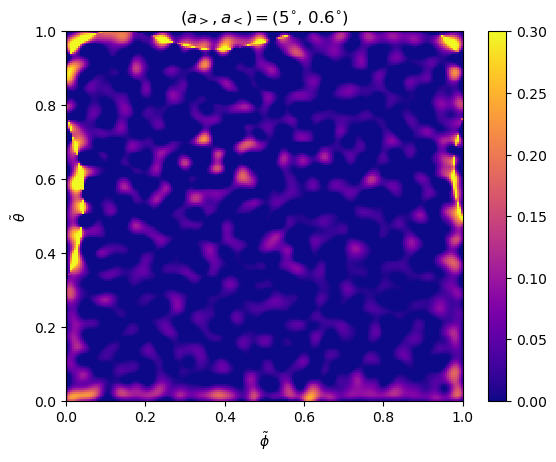

In [77]:
plot = plt.pcolormesh(arr_bx_plot, arr_by_plot, cwt_ratio.T, cmap='plasma', shading='flat'
                      , norm=mpl.colors.Normalize(vmin=0, vmax=0.3)
                     )
plt.colorbar(plot)
plt.title('$(a_> , a_< ) = ($' + str(degree_1) + '$^{\circ}$' + ', ' + str(degree_2) + '$^{\circ}$' + '$)$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('$\\tilde{\\phi}$')
plt.ylabel('$\\tilde{\\theta}$')

Text(0, 0.5, '$\\tilde{\\theta}$')

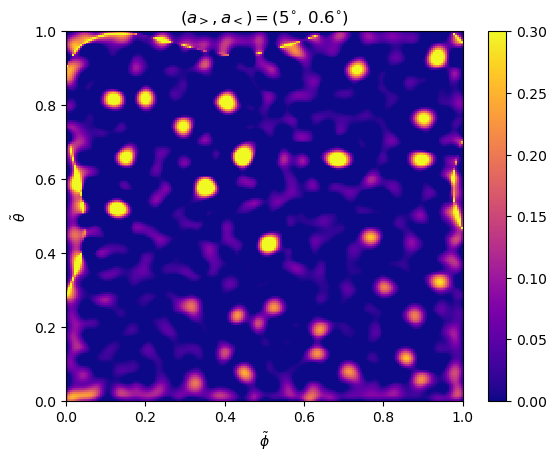

In [78]:
plot = plt.pcolormesh(arr_bx_plot, arr_by_plot, cwt_ratio_wps.T, cmap='plasma', shading='flat'
                      , norm=mpl.colors.Normalize(vmin=0, vmax=0.3)
                     )
plt.colorbar(plot)
plt.title('$(a_> , a_< ) = ($' + str(degree_1) + '$^{\circ}$' + ', ' + str(degree_2) + '$^{\circ}$' + '$)$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('$\\tilde{\\phi}$')
plt.ylabel('$\\tilde{\\theta}$')

/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in log10


Text(0, 0.5, 'N')

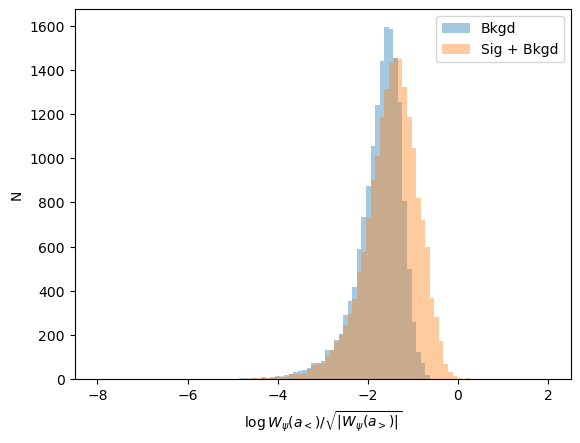

In [79]:
degree_1 = 5
scale_1 = degree_1 / 15  / 2
na1 = np.where(arr_a > scale_1)[0][0]

degree_2 = 0.6
scale_2 = degree_2 / 15  / 2
na2 = np.where(arr_a > scale_2)[0][0]

bins = np.linspace(-8,2,100)
cwt_ratio = cwt_map[:,:,na2] / np.sqrt(np.abs(cwt_map[:,:,na1]))

cwt_ratio_nb = np.zeros((Nx_nb, Nx_nb))
for nx in range(Nx_nb):
    kx = n_nb[nx]
    for ny in range(Nx_nb):
        ky = n_nb[ny]
        cwt_ratio_nb[nx,ny] = cwt_ratio[kx,ky]
        
cwt_ratio_flat_na = cwt_ratio_nb.flatten()
counts_bkg, bins, _ = plt.hist(np.log10(cwt_ratio_flat_na), bins = bins, alpha = 0.4, label = 'Bkgd')

cwt_ratio_wps = cwt_map_wps[:,:,na2] / np.sqrt(np.abs(cwt_map_wps[:,:,na1]))

cwt_ratio_wps_nb = np.zeros((Nx_nb, Nx_nb))
for nx in range(Nx_nb):
    kx = n_nb[nx]
    for ny in range(Nx_nb):
        ky = n_nb[ny]
        cwt_ratio_wps_nb[nx,ny] = cwt_ratio_wps[kx,ky]
        
cwt_ratio_wps_flat_na = cwt_ratio_wps.flatten()
counts_tot, bins, _ = plt.hist(np.log10(cwt_ratio_wps_flat_na), bins = bins, alpha = 0.4, label = 'Sig + Bkgd')

plt.legend()
plt.xlabel('$\\log W_{\\psi}(a_{<}) / \sqrt{|W_{\\psi}(a_{>})|}$')
plt.ylabel('N')

In [80]:
cwt_sig = np.empty(shape = (1))
Nps = len(xloc_list)
psf_scale = 0.4 / 15 / 2
effective_ps_size = 2 * psf_scale
for n in range(Nps):
    buf_loc_list = loc_list[np.newaxis, np.newaxis]
    point = loc_list[n]
    buf_point = point[np.newaxis, np.newaxis]
    
    index = closest_grid_point_(point, mesh_bxby)
    nx = index[0]
    ny = index[1]

    closest_point = mesh_bxby[index]
    buf_closest_point = closest_point[np.newaxis, np.newaxis]
    relative_positions = buf_closest_point - mesh_bxby
    distances = np.linalg.norm(relative_positions, axis = -1)
    indices = np.where(distances < effective_ps_size)
    kx = indices[0]
    ky = indices[1]

    cwt_sig_single = cwt_ratio_wps_nb[ky,kx].T
    cwt_sig = np.concatenate((cwt_sig, cwt_sig_single))

/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 1500.0)

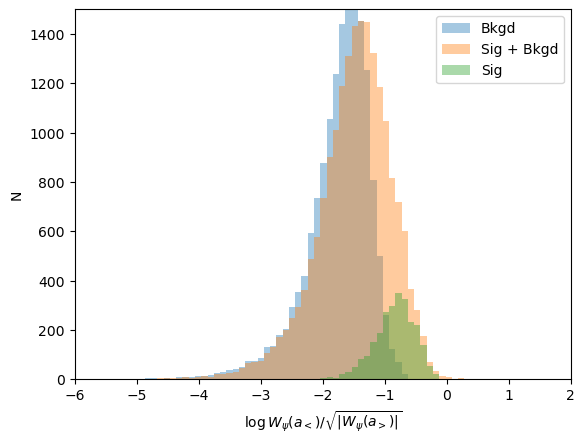

In [81]:
counts_bkg, bins, _ = plt.hist(np.log10(cwt_ratio_flat_na), bins = bins, alpha = 0.4, label = 'Bkgd')
counts_tot, bins, _ = plt.hist(np.log10(cwt_ratio_wps_flat_na), bins = bins, alpha = 0.4, label = 'Sig + Bkgd')
counts_sig, bins, _ = plt.hist(np.log10(cwt_sig), bins = bins, alpha = 0.4, label = 'Sig')

plt.legend()
plt.xlabel('$\\log W_{\\psi}(a_{<}) / \sqrt{|W_{\\psi}(a_{>})|}$')
plt.ylabel('N')
plt.xlim([-6,2])
plt.ylim([0,1500])

/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/het/p4/ramirez/envs/gcw/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


(0.0, 1500.0)

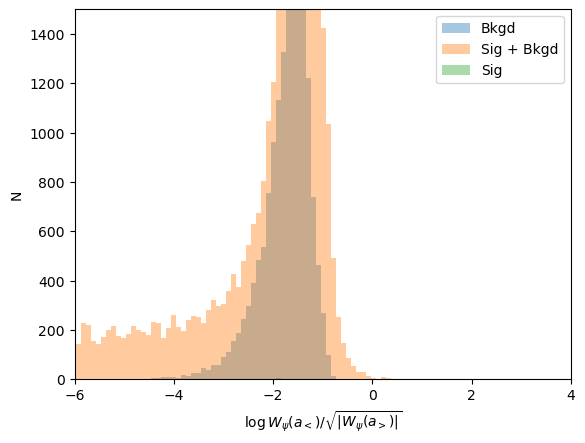

In [82]:
counts_bkg, bins, _ = plt.hist(np.log10(-cwt_ratio_flat_na), bins = bins, alpha = 0.4, label = 'Bkgd')
counts_tot, bins, _ = plt.hist(np.log10(-cwt_ratio_wps_flat_na), bins = bins, alpha = 0.4, label = 'Sig + Bkgd')
counts_sig, bins, _ = plt.hist(np.log10(-cwt_sig), bins = bins, alpha = 0.4, label = 'Sig')

plt.legend()
plt.xlabel('$\\log W_{\\psi}(a_{<}) / \sqrt{|W_{\\psi}(a_{>})|}$')
plt.ylabel('N')
plt.xlim([-6,4])
plt.ylim([0,1500])

Text(0, 0.5, '$\\tilde{\\theta}$')

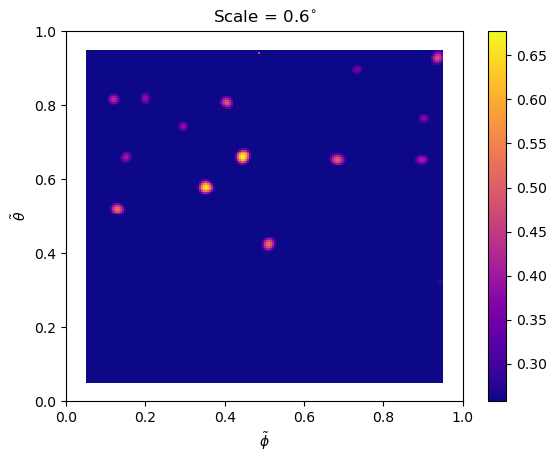

In [321]:
cwt_map_wps = np.load('cwt_map_wps_2.npy', allow_pickle = True)

cwt_map_wps_nb = np.zeros((Nx_nb, Nx_nb))
for nx in range(Nx_nb):
    kx = n_nb[nx]
    for ny in range(Nx_nb):
        ky = n_nb[ny]
        cwt_map_wps_nb[nx,ny] = cwt_map_wps[kx,ky,na]
        
plot = plt.pcolormesh(arr_bx_plot_nb, arr_by_plot_nb, cwt_ratio_wps_nb.T, cmap='plasma', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=np.max(cwt_ratio_nb), vmax=np.max(cwt_ratio_wps_nb)))
# contour needs the centers
# cset = plt.contour(X, Y, Z, cmap='gray')
# plt.clabel(cset, inline=True)

plt.colorbar(plot)
plt.title('Scale = ' + str(degree) + '$^{\circ}$')
# plt.title('Scale = ' + str(0.005))
# plt.hexbin(x_data,y_data, alpha = 0.5)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('$\\tilde{\\phi}$')
plt.ylabel('$\\tilde{\\theta}$')